In [227]:
import pandas as pd
import requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
job_data = pd.DataFrame(data)

In [163]:
job_data.columns  

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')

# New Section

In [164]:
job_data.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6


In [165]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

In [166]:
job_data.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
dtype: int64

In [167]:
job_data['company'].value_counts().head(5)

Amazon       8054
Microsoft    5162
Google       4313
Facebook     2962
Apple        2015
Name: company, dtype: int64

In [169]:
job_data['level'].value_counts().head(5)

L4                          5008
L5                          4861
L3                          3331
L6                          2866
Senior Software Engineer    1433
Name: level, dtype: int64

In [170]:
job_data['title'].value_counts().head(5)

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Name: title, dtype: int64

In [172]:
job_data['location'].value_counts().head(5)

Seattle, WA          8701
San Francisco, CA    6797
New York, NY         4562
Redmond, WA          2649
Mountain View, CA    2275
Name: location, dtype: int64

In [173]:
job_data['gender'].value_counts()

Male                               35702
                                   19540
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

# cleaning data

## gender

In [228]:
# Select gender as male or female data
clean_gender1 = job_data.loc[(job_data['gender'].isin(['Male', 'Female']))]
clean_gender1.shape

(42701, 17)

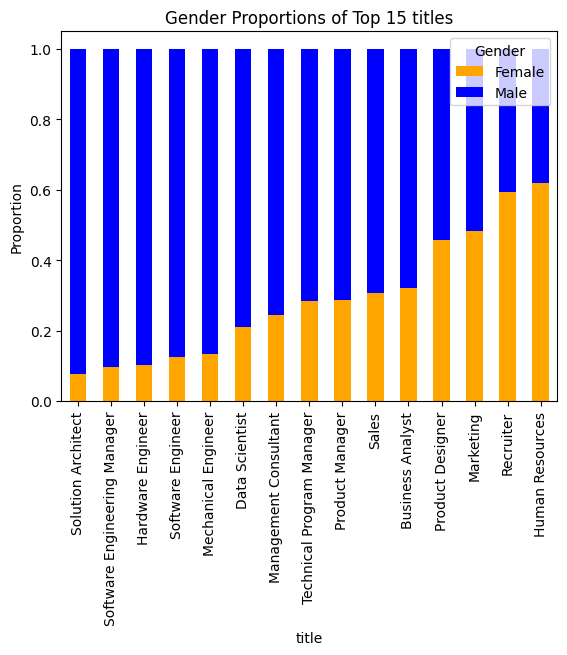

In [229]:
import matplotlib.pyplot as plt

gender_proportions = clean_gender1.groupby('title')['gender'].value_counts(normalize=True).unstack()
gender_proportions_sorted = gender_proportions.sort_values(by='Male', ascending=False)

top_15_companies = gender_proportions_sorted.head(15)

colors = [ 'orange','blue','green']  
top_15_companies.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('title')
plt.ylabel('Proportion')
plt.title('Gender Proportions of Top 15 titles')
plt.legend(title='Gender')

plt.show()


## country

In [230]:
import pandas as pd

def convert_country(location):
    country_dict = {
        'America': ['WA', 'CA', 'TX', 'IL', 'DC', 'NY', 'FL', 'PA', 'OH', 'GA', 'MA', 'MI', 'NC', 'NJ', 'VA', 'AZ', 'TN', 'IN', 'MO', 'MD', 'WI', 'MN', 'CO', 'AL', 'SC', 'LA', 'KY', 'OR', 'OK', 'CT', 'IA', 'UT', 'NV', 'AR', 'MS', 'KS', 'NM', 'NE', 'WV', 'ID', 'HI', 'NH', 'DE', 'RI', 'ME', 'MT', 'ND', 'SD', 'AK', 'VT', 'WY'],
        'Canada': ['Canada'],
        'India': ['India'],
        'United Kingdom': ['United Kingdom'],
        'Singapore': ['Singapore'],
        'Ireland': ['Ireland'],
        'Germany': ['Germany'],
        'Netherlands': ['Netherlands']
    }

    for key, value in country_dict.items():
        if any(keyword in location for keyword in value):
            return key

    return 'other'

In [231]:
country_data = pd.DataFrame(job_data)
country_data['location'] = clean_gender1['location'].apply(convert_country)
country_data['location'].value_counts().head(40)

America           35902
India              2128
other              1672
Canada             1246
United Kingdom      833
Germany             435
Singapore           246
Ireland             227
Netherlands          12
Name: location, dtype: int64

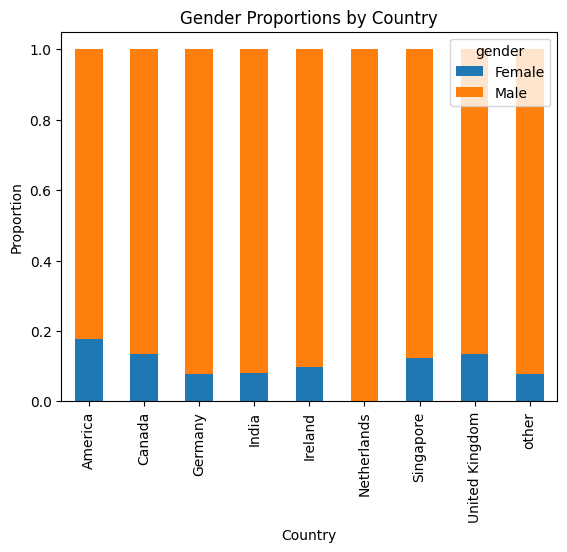

In [232]:
import matplotlib.pyplot as plt

country_gender_proportions = country_data.groupby('location')['gender'].value_counts(normalize=True).unstack()
country_gender_proportions.plot(kind='bar', stacked=True)


plt.title("Gender Proportions by Country")
plt.xlabel("Country")
plt.ylabel("Proportion")


plt.show()



In [233]:
# select America data
us_data = country_data[country_data['location'] == 'America'].copy()

In [234]:
us_data['gender'].value_counts()

Male      29573
Female     6329
Name: gender, dtype: int64

In [235]:
us_data.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
438,4/12/2018 16:15:32,GE Digital,Senior,Software Engineer,132,America,4,2,,124,0,8,Male,,7430,807,479
439,4/12/2018 23:19:33,Amazon,L5,Software Engineer,180,America,13,1,,163,17,0,Male,whuesh physauebs,11527,819,480
440,4/13/2018 6:32:17,Uber,L5,Software Engineer,306,America,9,2,,159,128,19,Male,,7419,807,481
442,4/13/2018 16:28:03,Microsoft,61,Software Engineer,158211,America,6,3,,144388,5357,8466,Male,triesh qioys caiary grents mcclaasp scoopt dwi...,11521,819,483
445,4/14/2018 13:05:22,Microsoft,60,Software Engineer,194,America,4,0,,173,6,15,Male,,11527,819,486


## number columns

In [236]:
# Convert columns to numeric type, handling non-numeric values
columns_to_convert = ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'cityid', 'dmaid', 'rowNumber']
for column in columns_to_convert:
    us_data[column] = pd.to_numeric(us_data[column], errors='coerce')

In [237]:
# Check the data types after conversion
us_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35902 entries, 438 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                35902 non-null  object 
 1   company                  35902 non-null  object 
 2   level                    35902 non-null  object 
 3   title                    35902 non-null  object 
 4   totalyearlycompensation  35902 non-null  int64  
 5   location                 35902 non-null  object 
 6   yearsofexperience        35902 non-null  int64  
 7   yearsatcompany           35902 non-null  int64  
 8   tag                      35902 non-null  object 
 9   basesalary               35902 non-null  int64  
 10  stockgrantvalue          35902 non-null  int64  
 11  bonus                    35902 non-null  int64  
 12  gender                   35902 non-null  object 
 13  otherdetails             35902 non-null  object 
 14  cityid              

In [248]:
numeric_columns = us_data.select_dtypes(include='number').columns
selected_columns = ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus'] 

In [239]:
#deal with 'basesalary' ，'basesalary' ,'stockgrantvalue','bonus'
selected_rows = us_data['basesalary'] > 999
us_data.loc[selected_rows, 'basesalary'] /= 1000
selected_rows = us_data['totalyearlycompensation'] > 999
us_data.loc[selected_rows, 'totalyearlycompensation'] /= 1000
selected_rows = us_data['stockgrantvalue'] > 999
us_data.loc[selected_rows, 'stockgrantvalue'] /= 1000
selected_rows = us_data['bonus'] > 999
us_data.loc[selected_rows, 'bonus'] /= 1000

clean_salary_data = us_data[(us_data['totalyearlycompensation'] > 0) & (us_data['totalyearlycompensation'] < 999)& (us_data['basesalary'] > 0) & (us_data['basesalary'] < 999)]


In [240]:
clean_salary_data.shape

(35047, 17)

KeyError: ignored

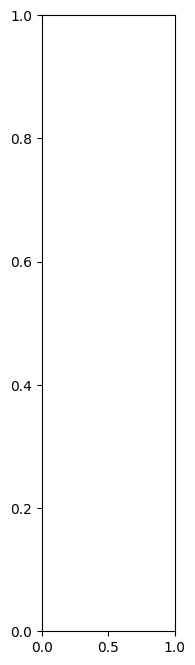

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  

for column in selected_columns:
    plt.subplot(1, len(selected_columns), list(selected_columns).index(column) + 1)
    sns.boxplot(data=clean_salary_data[column])
    plt.title(column)

plt.tight_layout()  
plt.show()  

In [242]:
clean_salary_data.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber
count,35047.000000,35047.000000,35047.000000,35047.000000,35047.000000,35047.000000,35047.000000,35046.000000,35047.000000
mean,224.442814,7.118926,2.719291,150.136363,55.610374,21.291162,9757.142494,717.319837,40442.867863
std,128.324635,6.547572,3.591597,66.375815,84.943618,29.048306,4778.111279,153.878013,23797.143825
min,1.006000,0.000000,0.000000,1.017000,0.000000,0.000000,0.000000,0.000000,479.000000
25%,138.000000,2.000000,0.000000,103.000000,3.000000,4.000000,7419.000000,613.000000,19439.500000
50%,197.000000,5.000000,1.000000,141.000000,27.000000,15.000000,8816.000000,807.000000,38565.000000
75%,276.000000,10.000000,4.000000,186.000000,70.000000,28.000000,11521.000000,819.000000,61415.500000
max,994.000000,58.000000,47.000000,944.000000,998.000000,981.000000,47913.000000,881.000000,83875.000000


In [243]:
import numpy as np
def handle_outliers(data, column, multiplier=4):
    if column in ['totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']:
        # Calculate the IQR
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)
        iqr = q3 - q1
        
        # Calculate the upper threshold
        upper_threshold = q3 + (multiplier * iqr)
        
        # Subset the data based on the thresholds
        filtered_data = data[(data[column] > 0) & (data[column] < upper_threshold)]
    else:
        # Calculate the IQR
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)
        iqr = q3 - q1
        
        # Calculate the upper and lower thresholds
        upper_threshold = q3 + (multiplier * iqr)
        lower_threshold = q1 - (multiplier * iqr)
        
        # Subset the data based on the thresholds
        filtered_data = data[(data[column] > lower_threshold) & (data[column] < upper_threshold)]
    
    return filtered_data

In [244]:
# delete outliers
clean_data1 = handle_outliers(clean_salary_data, 'basesalary')
clean_data2 = handle_outliers(clean_data1, 'totalyearlycompensation')
clean_data3 = handle_outliers(clean_data2, 'stockgrantvalue')
clean_data4 = handle_outliers(clean_data3, 'bonus')
clean_data5 = handle_outliers(clean_data4, 'yearsofexperience')
clean_data6 = handle_outliers(clean_data5, 'yearsatcompany')

In [245]:
clean_data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20854 entries, 440 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                20854 non-null  object 
 1   company                  20854 non-null  object 
 2   level                    20854 non-null  object 
 3   title                    20854 non-null  object 
 4   totalyearlycompensation  20854 non-null  float64
 5   location                 20854 non-null  object 
 6   yearsofexperience        20854 non-null  int64  
 7   yearsatcompany           20854 non-null  int64  
 8   tag                      20854 non-null  object 
 9   basesalary               20854 non-null  float64
 10  stockgrantvalue          20854 non-null  float64
 11  bonus                    20854 non-null  float64
 12  gender                   20854 non-null  object 
 13  otherdetails             20854 non-null  object 
 14  cityid              

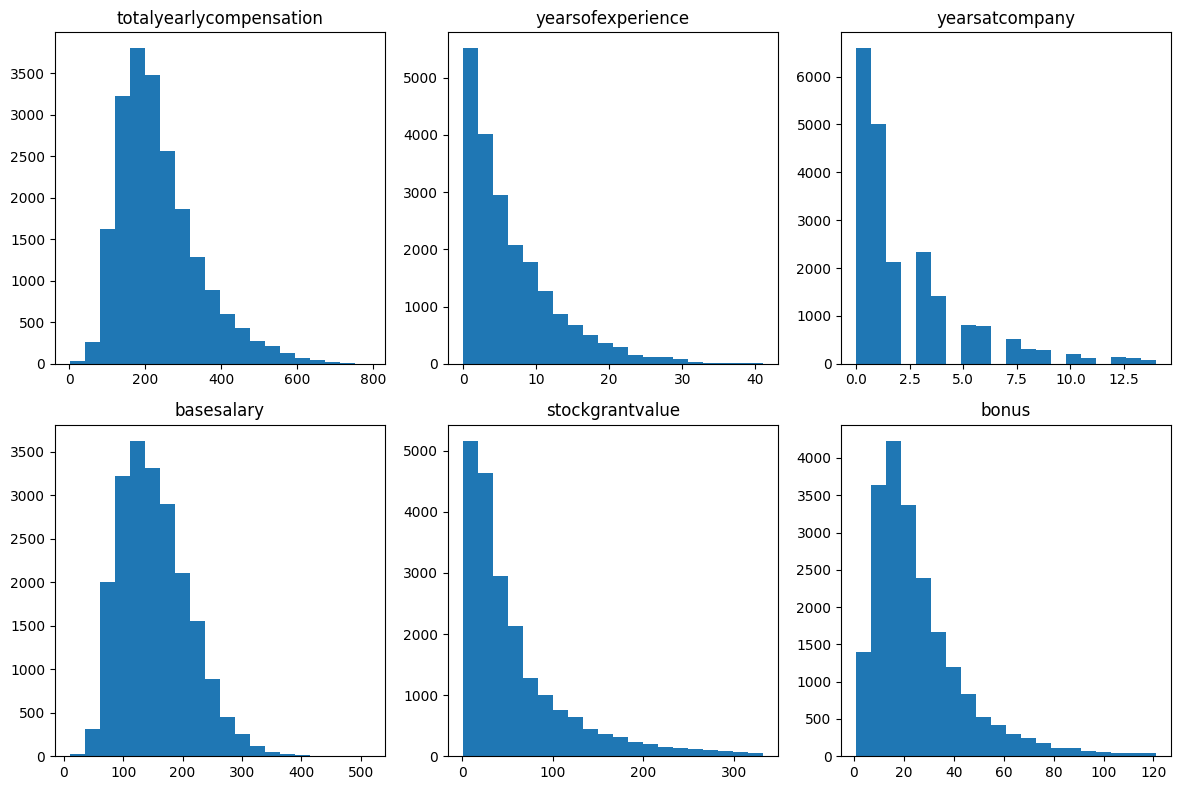

In [246]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, column in enumerate(selected_columns):
    ax = axes[i // 3, i % 3]
    ax.hist(clean_data6[column], bins=20)
    ax.set_title(column)

plt.tight_layout()

plt.show()


## category columns

In [254]:
clean_data6['gender'].value_counts()

Male      17174
Female     3680
Name: gender, dtype: int64

In [255]:
# Select gender as male or female data
category_df = clean_data6.copy()

In [256]:
category_df.shape

(20854, 17)

In [258]:
category_df['company'].value_counts().head(3)

Microsoft    2732
Google       2303
Amazon       2259
Name: company, dtype: int64

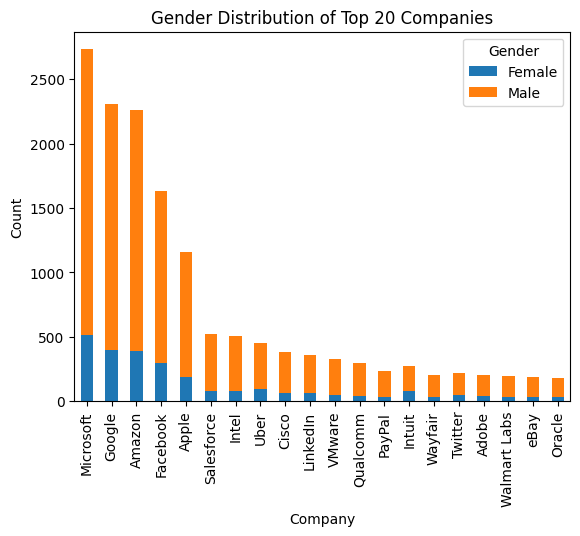

In [259]:
import matplotlib.pyplot as plt

gender_counts = category_df.groupby('company')['gender'].value_counts().unstack()

gender_counts_sorted = gender_counts.sort_values(by='Male', ascending=False)

top_10_companies = gender_counts_sorted.head(20)

top_10_companies.plot(kind='bar', stacked=True)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Gender Distribution of Top 20 Companies')
plt.legend(title='Gender')
plt.show()



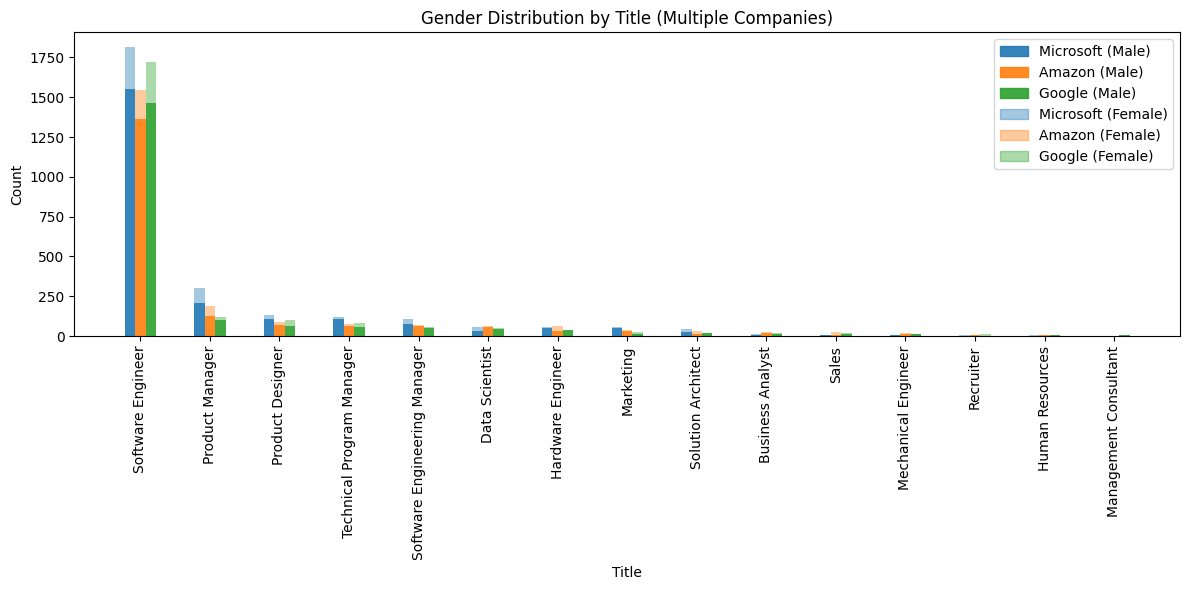

In [356]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
alpha_male = 0.9
alpha_female = 0.4

companies = ['Microsoft', 'Amazon', 'Google']
colors_dict = {company: colors[index % len(colors)] for index, company in enumerate(companies)}


fig, ax = plt.subplots(figsize=(12, 6))


for index, company in enumerate(companies):
    company_data = category_df[category_df['company'] == company]
    title_counts = company_data['title'].value_counts()
    
    male_counts = []
    female_counts = []
    
    for title in title_counts.index:
        male_count = len(company_data[(company_data['title'] == title) & (company_data['gender'] == 'Male')])
        female_count = len(company_data[(company_data['title'] == title) & (company_data['gender'] == 'Female')])
        male_counts.append(male_count)
        female_counts.append(female_count)
    
    x = np.arange(len(title_counts))
    width = 0.15
    
    ax.bar(x + index*width, male_counts, width, align='center', color=colors_dict[company], alpha=alpha_male)
    ax.bar(x + index*width, female_counts, width, bottom=male_counts, align='center', color=colors_dict[company], alpha=alpha_female)

legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors_dict[company], alpha=alpha_male, label=f'{company} (Male)')
                   for company in companies]
legend_elements += [plt.Rectangle((0, 0), 1, 1, color=colors_dict[company], alpha=alpha_female, label=f'{company} (Female)')
                    for company in companies]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_xlabel('Title')
ax.set_ylabel('Count')
ax.set_xticks(x + (len(companies) - 1) * width / 2)
ax.set_xticklabels(title_counts.index, rotation=90)
ax.set_title('Gender Distribution by Title (Multiple Companies)')

plt.tight_layout()
plt.show()



### 3个公司

category_df 

3个公司的Software Engineer和Software Engineering Manager的男女经验值分布

In [267]:
def convert_level_Microsoft(level):
    level_dict = {
        'Junior': ['SDE', '59', 'L59', '60', 'L60', 'PM 1', 'PM 2', 'PM2', 'Level 60', 'SDE 59'],
        'Intermediate': ['SDE I', '61', 'L61', '62', 'L62', 'Designer 2', 'Level 61', 'SDE 2', 'SDE 2 / 61', 'SDE II (61)', 'SDE II (62)', 'SDE II L62', 'SDE2', 'SWE II', 'l62', 'Program Manager 2'],
        'Senior': ['Senior SDE', '63', 'L63', 'l63', '64', 'L64', 'Senior', 'Senior Designer', 'Senior PM', 'Senior Manager', 'Senior Architect', 'T65'],
        'Principal': ['Principal SDE', '65', 'L65', '66', 'L66', '67', 'L67', 'Principal PM', 'Principal EM'],
        'Partner': ['Partner', '68', 'L68', '69', 'L69', '70', 'Distinguished Engineer', '80', 'Technical Fellow']
    }

    for key, value in level_dict.items():
        if level in value:
            return key

    return 'other'

In [266]:
def convert_level_Google(level):
    level_dict = {
        'Junior': ['L3', 'SWE I'],
        'Intermediate': ['L4', 'SWE HI'],
        'Senior': ['L5', 'L7 ', 'L6', 'Staff SWE', 'Senior Staff SWE', 'Senior SWE'],
        'Principal': ['L8', 'Principal Engineer'],
        'Partner': ['L9', 'L10', 'Distinguished Engineer', 'Google Fellow']
    }

    for key, value in level_dict.items():
        if level in value:
            return key

    return 'other'

In [265]:
def convert_level_Amazon(level):
    level_dict = {
        'Junior': ['SDE I', ' L4'],
        'Intermediate': ['SDE II', 'L5'],
        'Senior': ['SDE MI', 'L6', 'Senior SDE'],
        'Principal': ['Senior Principal SDE', 'L8', 'Principal SDE', 'L7'],
        'Partner': ['Distinguished Engineer', 'L10']
    }

    for key, value in level_dict.items():
        if level in value:
            return key

    return 'other'

In [272]:
category_df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
440,4/13/2018 6:32:17,Uber,L5,Software Engineer,306.000,America,9,2,,159.000,128.000,19.000,Male,,7419,807.0,481
442,4/13/2018 16:28:03,Microsoft,61,Software Engineer,158.211,America,6,3,,144.388,5.357,8.466,Male,triesh qioys caiary grents mcclaasp scoopt dwi...,11521,819.0,483
445,4/14/2018 13:05:22,Microsoft,60,Software Engineer,194.000,America,4,0,,173.000,6.000,15.000,Male,,11527,819.0,486
446,4/14/2018 14:33:31,Microsoft,64,Software Engineer,277.819,America,12,11,,194.777,46.606,36.436,Male,,11521,819.0,487
447,4/15/2018 8:12:48,Workday,P2,Software Engineer,172.916,America,2,2,,87.280,82.083,3.553,Male,buiss taogh hypauedy trangly,7369,807.0,488


In [273]:
companies = ['Microsoft', 'Amazon', 'Google']
top_titles = ['Software Engineer', 'Software Engineering Manager']

company_data = category_df[category_df['company'].isin(companies)]
title_data = company_data[company_data['title'].isin(top_titles)]
title_data['title'].value_counts()

Software Engineer               5082
Software Engineering Manager     242
Name: title, dtype: int64

In [274]:
title_data['level'].value_counts().head(10)

L4       1299
L5        802
L3        619
61        306
60        301
59        266
62        264
63        256
SDE I     229
64        175
Name: level, dtype: int64

In [279]:
Microsoft_data = title_data[title_data['company'] == 'Microsoft']
Google_data = title_data[title_data['company'] == 'Google']
Amazon_data = title_data[title_data['company'] == 'Amazon']

In [281]:
Microsoft_data1 = pd.DataFrame(Microsoft_data)
Google_data1 = pd.DataFrame(Google_data)
Amazon_data1 = pd.DataFrame(Amazon_data)

Microsoft_data1['level'] = Microsoft_data['level'].apply(convert_level_Microsoft)
Google_data1['level'] = Google_data['level'].apply(convert_level_Google)
Amazon_data1['level'] = Amazon_data['level'].apply(convert_level_Amazon)

In [285]:
Amazon_data1['level'].value_counts()

other           765
Intermediate    567
Junior          229
Senior           45
Principal         4
Name: level, dtype: int64

In [338]:
import pandas as pd

combined_data = pd.concat([Microsoft_data1, Google_data1, Amazon_data1], ignore_index=True)

combined_data.head(5)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,4/13/2018 16:28:03,Microsoft,Intermediate,Software Engineer,158.211,America,6,3,,144.388,5.357,8.466,Male,triesh qioys caiary grents mcclaasp scoopt dwi...,11521,819.0,483
1,4/14/2018 13:05:22,Microsoft,Junior,Software Engineer,194.000,America,4,0,,173.000,6.000,15.000,Male,,11527,819.0,486
2,4/14/2018 14:33:31,Microsoft,Senior,Software Engineer,277.819,America,12,11,,194.777,46.606,36.436,Male,,11521,819.0,487
3,4/16/2018 6:49:59,Microsoft,Intermediate,Software Engineer,270.000,America,4,0,,154.000,98.000,18.000,Male,,11470,819.0,493
4,4/18/2018 15:16:20,Microsoft,Intermediate,Software Engineer,208.290,America,3,1,,180.195,15.337,12.758,Male,,11521,819.0,504


In [363]:
pivot_table1 = pd.crosstab(index=[combined_data['title'], combined_data['level']], columns=company_data['gender'], values=company_data['totalyearlycompensation'], aggfunc='mean')

pivot_table1


gender                                         Female        Male
title                        level                               
Software Engineer            Intermediate  251.666667  259.978892
                             Junior        175.479400  240.858222
                             Principal            NaN  503.119000
                             Senior        226.243000  229.067167
                             other         251.300000  280.269231
Software Engineering Manager Junior               NaN  267.000000
                             Principal            NaN  345.305500
                             Senior               NaN  297.600000
                             other         123.000000  171.000000

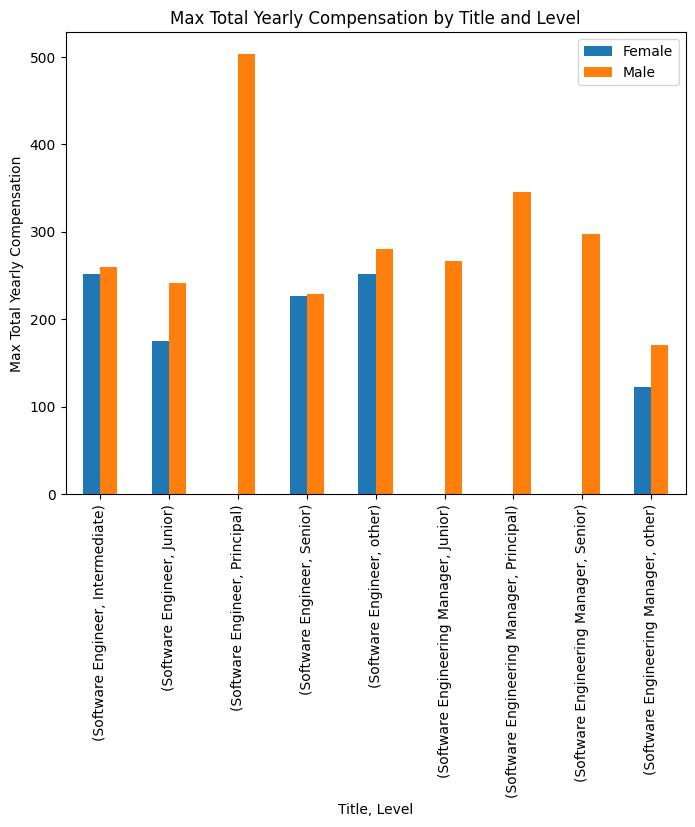

In [364]:

pivot_table2 = pd.pivot_table(combined_data, index=['title', 'level'], columns='gender', values='totalyearlycompensation', aggfunc='mean')


pivot_table1.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Title, Level')
plt.ylabel('Max Total Yearly Compensation')
plt.title('Max Total Yearly Compensation by Title and Level')
plt.legend()
plt.show()

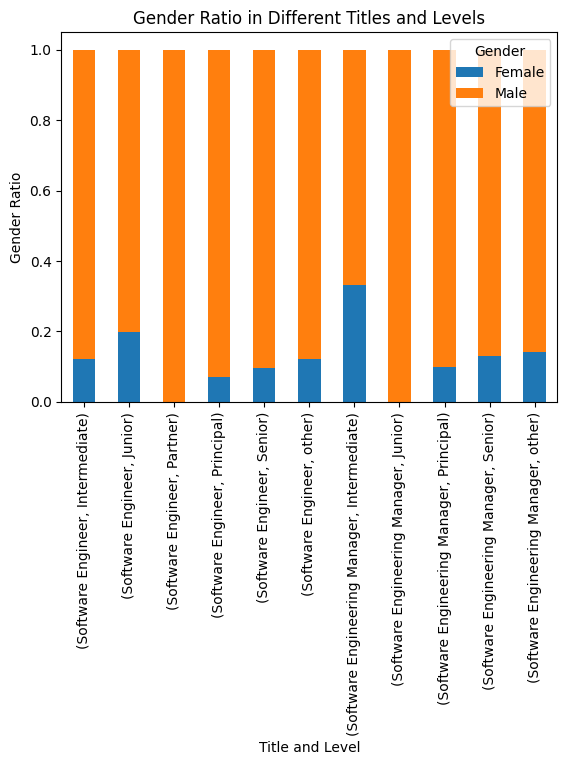

In [301]:
import matplotlib.pyplot as plt

title_level_gender_counts = combined_data.groupby(['title', 'level', 'gender']).size().unstack()

title_level_total_counts = combined_data.groupby(['title', 'level']).size()

title_level_gender_ratios = title_level_gender_counts.div(title_level_total_counts, axis=0)

title_level_gender_ratios.plot(kind='bar', stacked=True)
plt.xlabel('Title and Level')
plt.ylabel('Gender Ratio')
plt.title('Gender Ratio in Different Titles and Levels')
plt.legend(title='Gender')
plt.show()




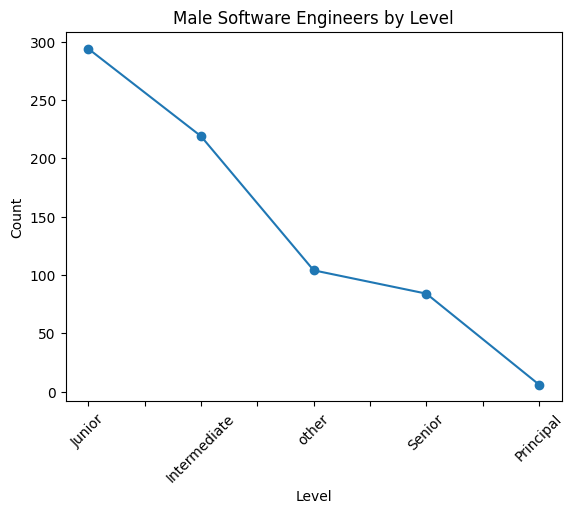

In [366]:
import matplotlib.pyplot as plt

female_se_data = combined_data[(combined_data['title'] == 'Software Engineer') & (combined_data['gender'] == 'Female') ]
female_se_level_counts = female_se_data['level'].value_counts().sort_values(ascending=False)

female_se_level_counts.plot(kind='line', marker='o')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Male Software Engineers by Level')
plt.xticks(rotation=45)
plt.show()




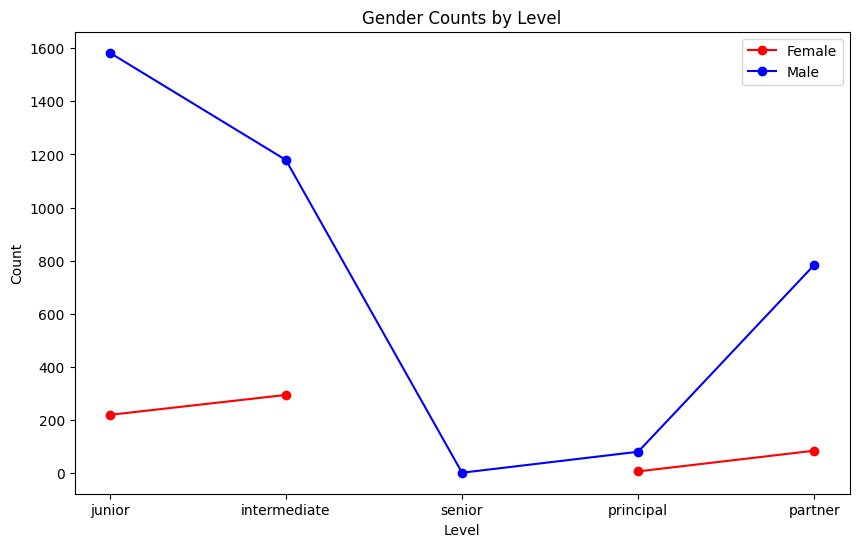

In [335]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = combined_data[(combined_data['level'] != 'other') & (combined_data['title'] == 'Software Engineer')]

gender_counts = filtered_data.groupby(['level', 'gender']).size().unstack()

levels = ['junior', 'intermediate', 'senior', 'principal', 'partner']
colors = ['red','blue']

plt.figure(figsize=(10, 6))
for gender, color in zip(gender_counts.columns, colors):
    plt.plot(levels, gender_counts.loc[:, gender], marker='o', color=color, label=gender)

plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Gender Counts by Level')
plt.legend()
plt.show()

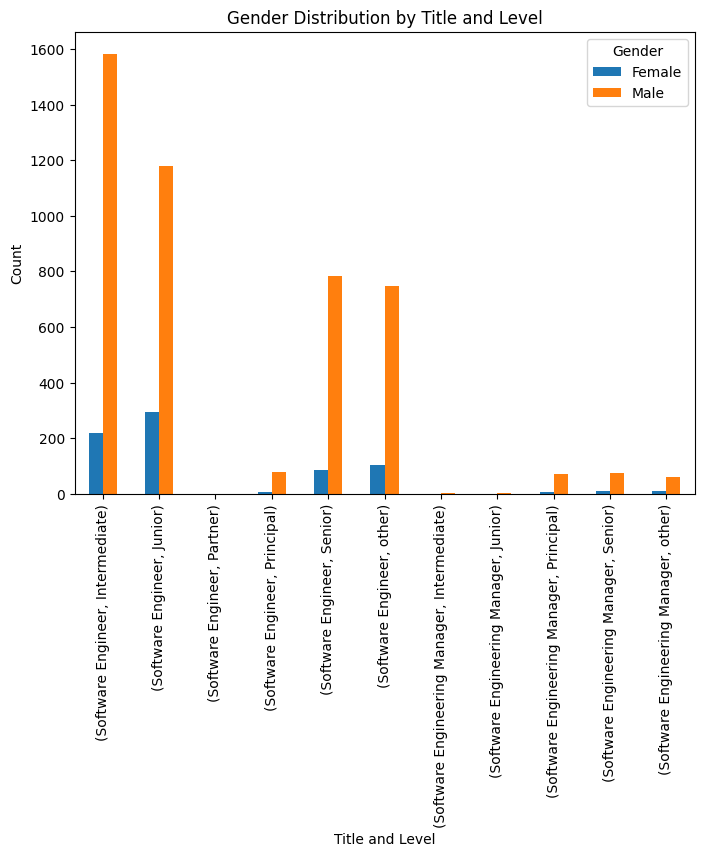

In [318]:
import matplotlib.pyplot as plt

title_level_gender_counts = combined_data.groupby(['title', 'level', 'gender']).size().unstack()

title_level_gender_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Title and Level')
plt.ylabel('Count')
plt.title('Gender Distribution by Title and Level')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()

